In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy.stats import chi2_contingency
import pingouin

#import gzip
#import json
#import string
#import nltk # imports the natural language toolkit
#import plotly


In [ ]:
data_desc = pd.read_csv('DescripcionNew.csv', encoding = 'latin-1')
data_desc = data_desc[data_desc.Linea_Negocio.isin(['Geoaseo','Geolumina','Geoambiental'] )]
data_desc.head()

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
2,TIK1006,Se debe realizar la configuración de los servi...,1.607954e+07,1- Nuevo requerimiento,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
3,TIK1015,Análisis Calidad y verificaciones.,1.058818e+09,1- Nuevo requerimiento,NaN,NaN,NR,Codensa,Geolumina
5,TIK1007,Crear servicios Geoserver,2.434355e+07,"Publicación de servicios, capas",NaN,NaN,SS,Llanogas,Geolumina
8,TIK1008,Crear servicios Geoserver,2.434355e+07,"Publicación de servicios, capas",NaN,NaN,SS,Llanogas,Geolumina
12,TIK1020,publicación servicio Geoserver,2.434355e+07,1- Nuevo requerimiento,NaN,NaN,NR,Llanogas,Geolumina


In [ ]:
data_desc["Linea_Negocio"].unique()

array(['SIGMA', 'Geoaseo', 'Geolumina', 'Geoambiental'], dtype=object)

Text(0.4, 1.08, 'Tickets')

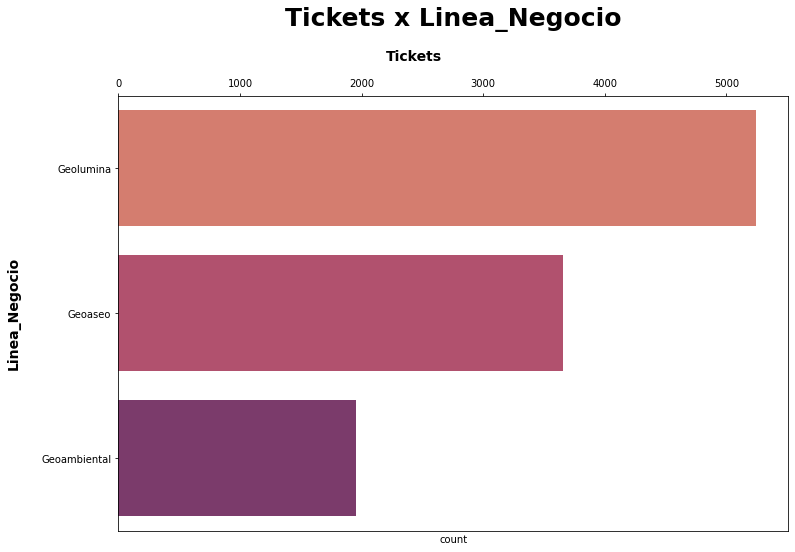

In [ ]:
max_min= data_desc['Linea_Negocio'].value_counts().index
#Datos grafica:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y = 'Linea_Negocio', data = data_desc, palette='flare', order= max_min) #data
plt.title('Tickets x Linea_Negocio', size = 25, weight=600, pad = 70) 
plt.ylabel('Linea_Negocio', size = 14, weight=600, labelpad=20) #titulo y
ax.xaxis.set_ticks_position('top') #subir #s eje x
ax.text(0.40, 1.08, 'Tickets', transform=ax.transAxes, size=14, weight=600) #subir el nombr

Text(0.4, 1.08, 'tickets')

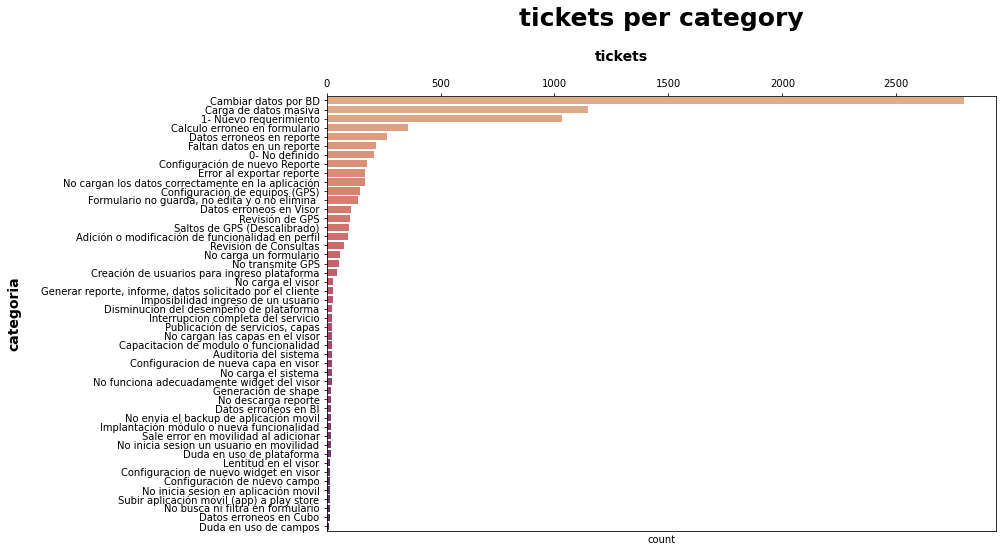

In [ ]:
max_min= data_desc['categoria'].value_counts().index
#Datos grafica:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y = 'categoria', data = data_desc, palette='flare', order= max_min) #data
plt.title('tickets per category', size = 25, weight=600, pad = 70) 
plt.ylabel('categoria', size = 14, weight=600, labelpad=20) #titulo y
ax.xaxis.set_ticks_position('top') #subir #s eje x
ax.text(0.40, 1.08, 'tickets', transform=ax.transAxes, size=14, weight=600) #subir el nombr

0.0

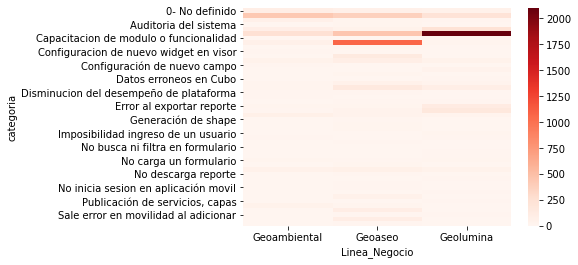

In [ ]:
my_contingency_table = pd.crosstab(index=data_desc["categoria"], columns=data_desc["Linea_Negocio"])
my_contingency_table
sns.heatmap(my_contingency_table, cmap="Reds")
chi2_contingency(my_contingency_table)[1]

In [ ]:
my_contingency_table

Linea_Negocio,Geoambiental,Geoaseo,Geolumina
categoria,,,
0- No definido,92,61,53
1- Nuevo requerimiento,433,376,225
Adición o modificación de funcionalidad en perfil,65,18,11
Auditoria del sistema,0,22,0
Calculo erroneo en formulario,88,41,230
Cambiar datos por BD,253,450,2095
Capacitacion de modulo o funcionalidad,2,7,14
Carga de datos masiva,59,1064,23
Configuracion de nueva capa en visor,3,13,6


<AxesSubplot:>

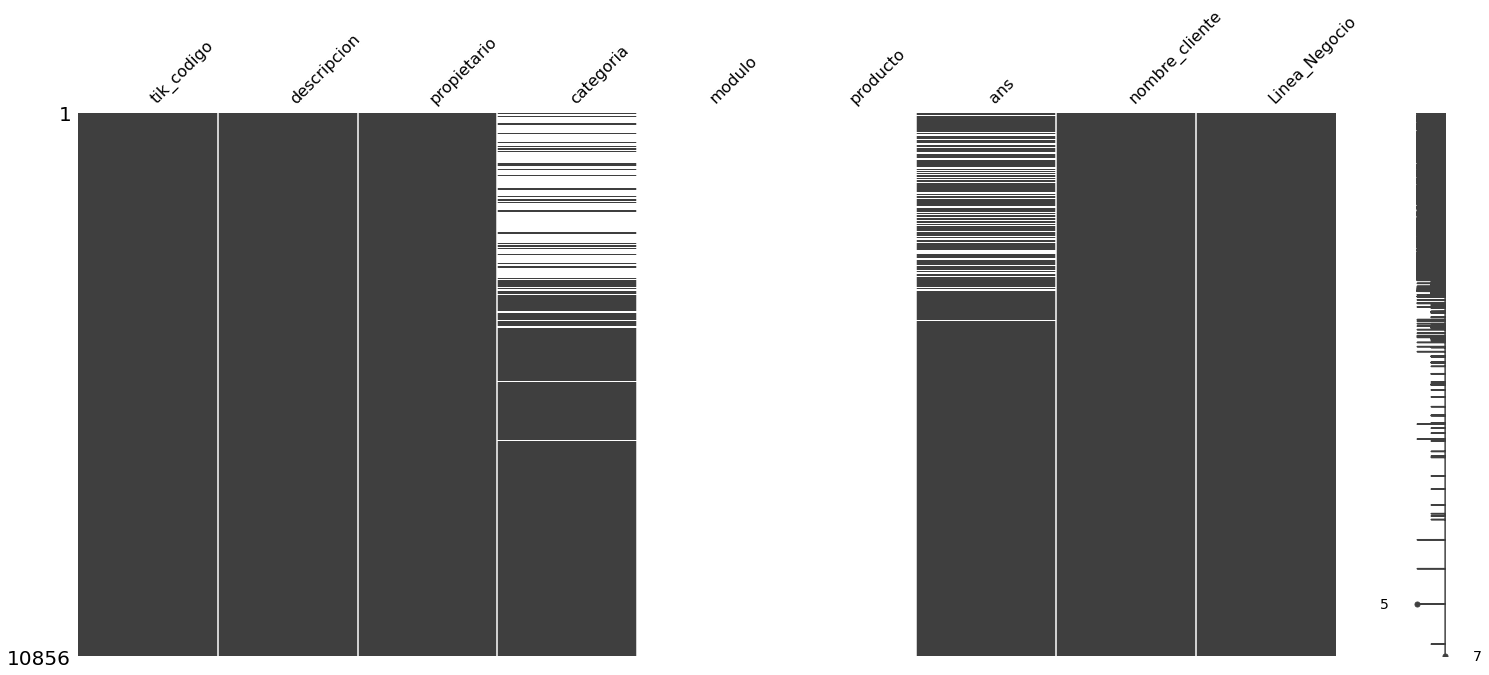

In [ ]:
msno.matrix(data_desc)

Text(0.5, 1.0, 'Categoria vs.Linea de negocio (normalized by index)')

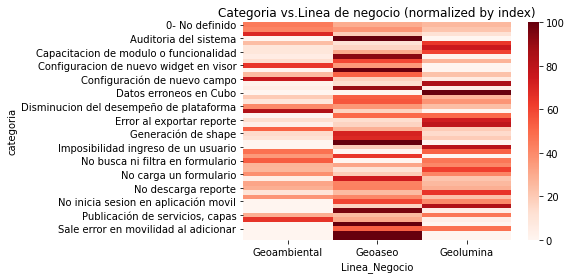

In [ ]:
my_contingency_table_by_index=pd.crosstab(index=data_desc["categoria"], columns=data_desc["Linea_Negocio"], normalize="index")*100
ax = sns.heatmap(my_contingency_table_by_index, cmap="Reds")
ax.set_title("Categoria vs.Linea de negocio (normalized by index)")

In [ ]:
my_contingency_table_by_index

Linea_Negocio,Geoambiental,Geoaseo,Geolumina
categoria,,,
0- No definido,44.660194,29.611650,25.728155
1- Nuevo requerimiento,41.876209,36.363636,21.760155
Adición o modificación de funcionalidad en perfil,69.148936,19.148936,11.702128
Auditoria del sistema,0.000000,100.000000,0.000000
Calculo erroneo en formulario,24.512535,11.420613,64.066852
Cambiar datos por BD,9.042173,16.082916,74.874911
Capacitacion de modulo o funcionalidad,8.695652,30.434783,60.869565
Carga de datos masiva,5.148342,92.844677,2.006981
Configuracion de nueva capa en visor,13.636364,59.090909,27.272727


Text(0.5, 1.0, 'Categoria vs.Linea de negocio (normalized by columns)')

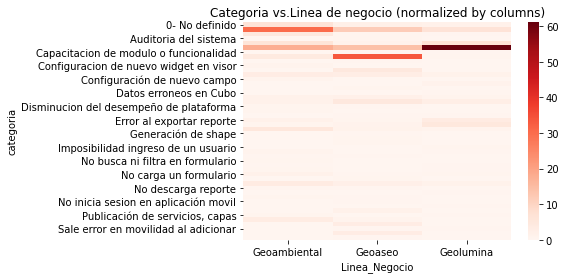

In [ ]:
my_contingency_table_by_columns=pd.crosstab(index=data_desc["categoria"], columns=data_desc["Linea_Negocio"], normalize="columns")*100
ax = sns.heatmap(my_contingency_table_by_columns, cmap="Reds")
ax.set_title("Categoria vs.Linea de negocio (normalized by columns)")

In [ ]:
my_contingency_table_by_columns

Linea_Negocio,Geoambiental,Geoaseo,Geolumina
categoria,,,
0- No definido,6.456140,1.927939,1.544739
1- Nuevo requerimiento,30.385965,11.883692,6.557855
Adición o modificación de funcionalidad en perfil,4.561404,0.568900,0.320606
Auditoria del sistema,0.000000,0.695322,0.000000
Calculo erroneo en formulario,6.175439,1.295828,6.703585
Cambiar datos por BD,17.754386,14.222503,61.060915
Capacitacion de modulo o funcionalidad,0.140351,0.221239,0.408044
Carga de datos masiva,4.140351,33.628319,0.670358
Configuracion de nueva capa en visor,0.210526,0.410872,0.174876


******************* SOLUCION TECNICA *********************

In [ ]:
data_slntec = pd.read_csv('SolucionTecnica.csv')
data_slntec.head()

,tik_codigo,usu_codigo,analisis,elementos_afectados,plan_de_trabajo
0,TIK2189,1053839482,Ya se creo el proyecto S/E MOSQUERA para AT\n,tab_dwh_proyecto,Ya se creo el proyecto S/E MOSQUERA para AT\n
1,TIK1084,1053839482,quedaron listos los iconos indicados en cada u...,tra_base.tab_tra_base_json_esquema,quedaron listos los iconos indicados en cada u...
2,TIK6386,1053811887,No se encontraba en bd el formulario ni otros ...,"t_objbase, t_objfuncion yt_objpresen",No se encontraba en bd el formulario ni otros ...
3,TIK1077,1058818488,se ejecuto nuevamente la consulta,no,no
4,TIK1750,1053847182,Eliminar valores duplicados y configurar permi...,"t_visita, t_inform",Eliminar valores duplicados y configurar permi...


In [ ]:
data_slnCli = pd.read_csv('SolucionCliente.csv')
data_slnCli.head()

,tik_codigo,usu_codigo,solucion
0,TIK1077,1058818488,Se ejecuto nuevamente la consulta
1,TIK1690,1053856994,"buenos días,\n\nSe informa que la información ..."
2,TIK1359,1053856994,Crear perfiles y permisos
3,TIK9914,75107519,"De acuerdo a la novedad, se validó en conjunto..."
4,TIK8485,1053860140,avanzando en los pendientes que quedaron en la...


In [ ]:
data_diag = pd.read_csv('Diagnostico.csv')
data_diag.head()
#data_diag.describe


,tik_codigo,usu_codigo,tipo,descripcion
0,TIK1084,1058818488,EXTERNO,Por favor cambiar los siguientes iconos en el ...
1,TIK1015,1058818488,INTERNO,El día de hoy se realizaron pruebas en desarro...
2,TIK1035,1053808742,INTERNO,Se realizará la función que recorra los ticket...
3,TIK1101,75081723,INTERNO,Se va a trabajar desde el analisis con leydi y...
4,TKT1000,1053860140,SOLUCION,Se libera por autorización de Guillermo
